# HR Analytics Project- Understanding the Attrition in HR

**Problem Statement:**

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


There are 1470 rows and 35 columns present in the dataset.

In [3]:
# checking the name of the columns and datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Target variable i.e. Attrition is object so we'll use Classification to learn our model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dataset don't have a any null value.

<AxesSubplot:>

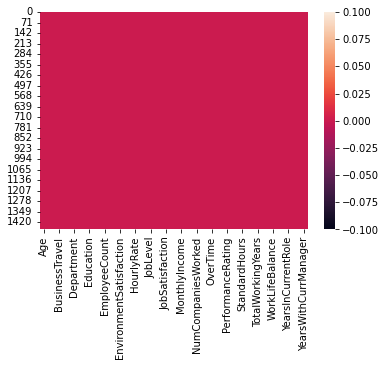

In [6]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis

# Univariate Analysis

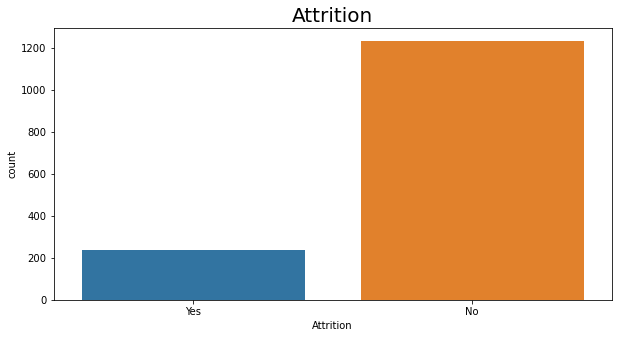

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition", fontsize = 20)
plt.show()

Count of No is much heigher than yes.

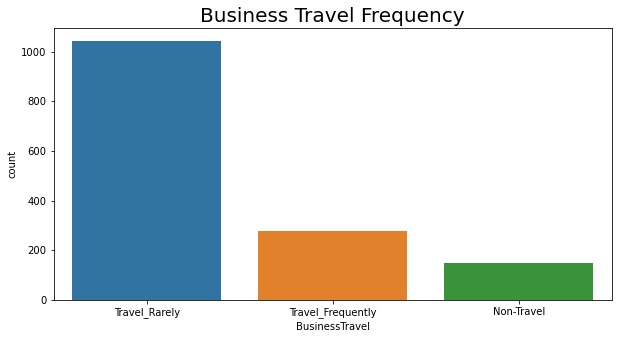

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(x="BusinessTravel", data=df)
plt.title("Business Travel Frequency", fontsize = 20)
plt.show()

Most of the employees travel rarely/no travel, there are few who travel frequently.

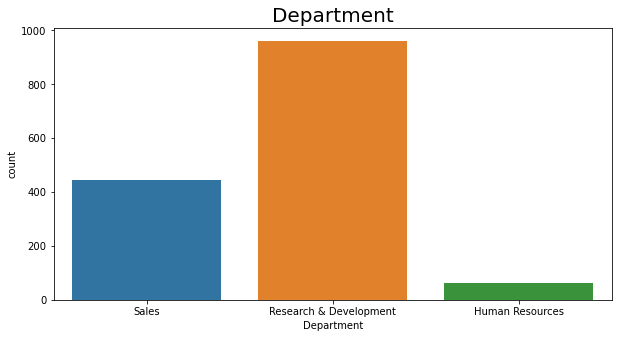

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x="Department", data=df)
plt.title("Department", fontsize = 20)
plt.show()

Most of the employees work in R&D dept and significant employees in sales team.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

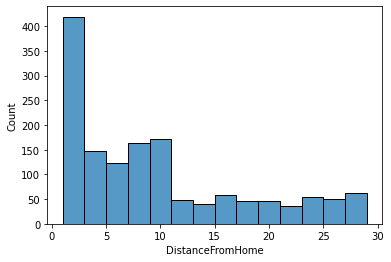

In [10]:
sns.histplot(df['DistanceFromHome'])

The data shows maximum employees are from nearby location and the maximum distance from home is less than 30 Kms

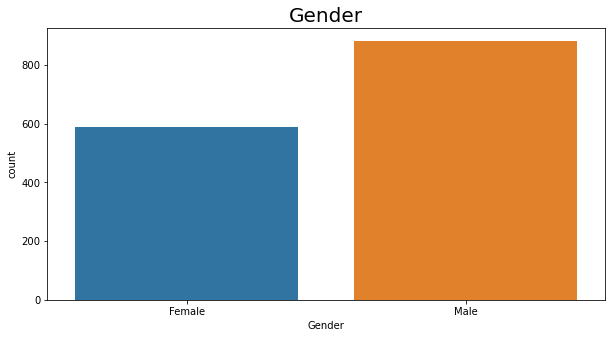

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(x="Gender", data=df)
plt.title("Gender", fontsize = 20)
plt.show()

There are more than 800 males and around 600 females in the dataset.

# Bivariate Analysis

Text(0.5, 1.0, 'Attrition vs Job Satisfaction')

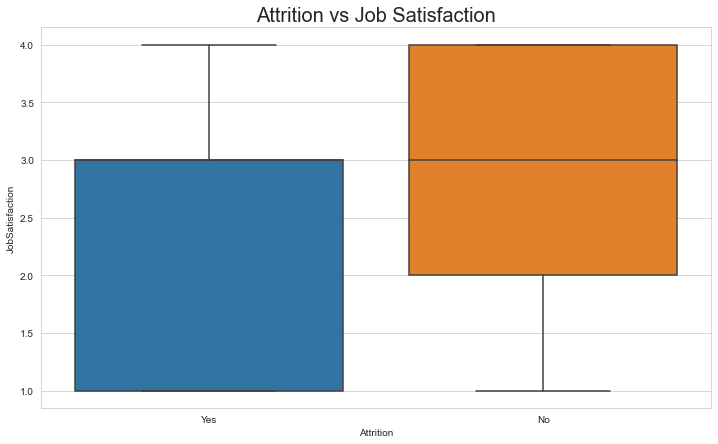

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="JobSatisfaction",data=df)
plt.title("Attrition vs Job Satisfaction", fontsize = 20)

Employees who are not satisfied with their job are likely to leave the current job.

Text(0.5, 1.0, 'Attrition vs Years in current role')

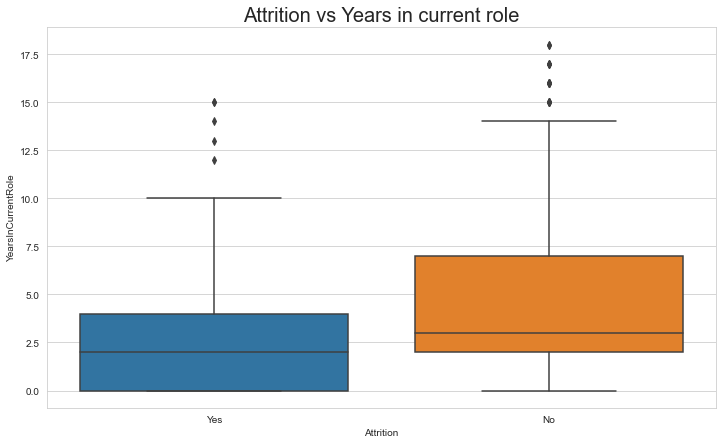

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="YearsInCurrentRole",data=df)
plt.title("Attrition vs Years in current role", fontsize = 20)

Here we can clearly see, if number of years spent on Current Role is less than employee are likely to leave their job.

<AxesSubplot:xlabel='Age', ylabel='count'>

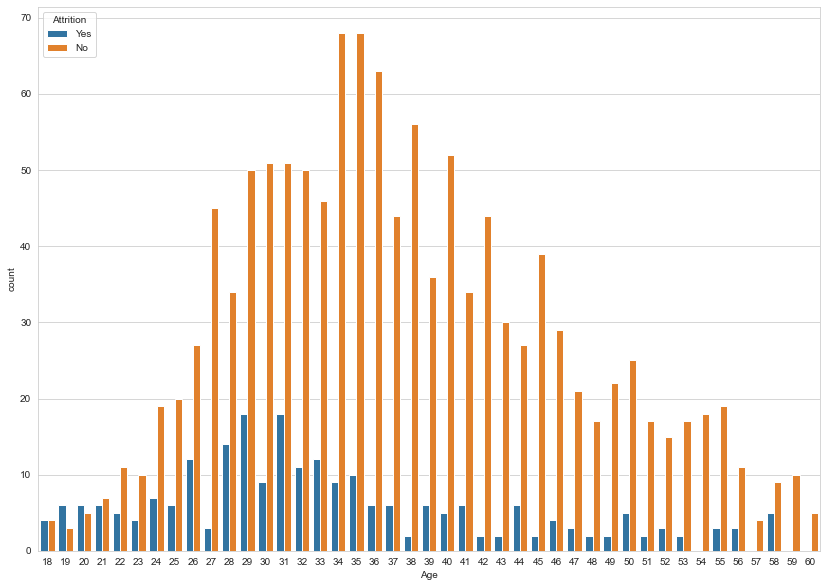

In [14]:
# Lets check the Attrition as per age to get more insights from the data
plt.subplots(figsize=(14,10))
sns.countplot(x="Age", hue="Attrition", data=df)

Employees from agegroup of 26 to 33 left the company most, so attrition rate seems very high in that age group whereas agegroup of 34 to 40 are highest to stay with the company.

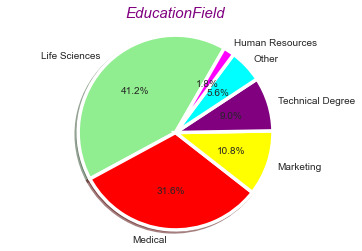

In [15]:
plt.pie(x=df['EducationField'].value_counts(),labels=df['EducationField'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','red','yellow','purple','cyan','magenta'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(df.columns[7],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Out of total - 41.2 % from Life Sciences,31.6% from Medical,10.8 % from Marketing,9 % from Technical Degree,5.6 % from Others and 1.8 % from Human Resouces.

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

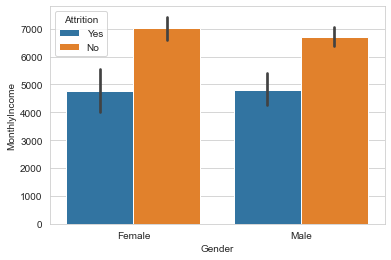

In [16]:
sns.barplot(y='MonthlyIncome',x='Gender',hue='Attrition',data=df)

Female employess are getting more monthly income than Males and employees <5000 monthly income likely to move.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

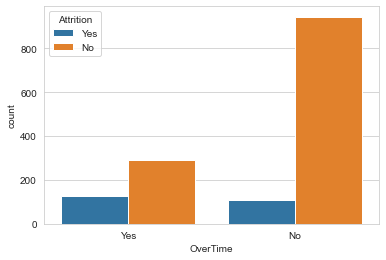

In [17]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

Overtime is not playing any significant role in Attrition as maximun employees didnot opt for overtime.

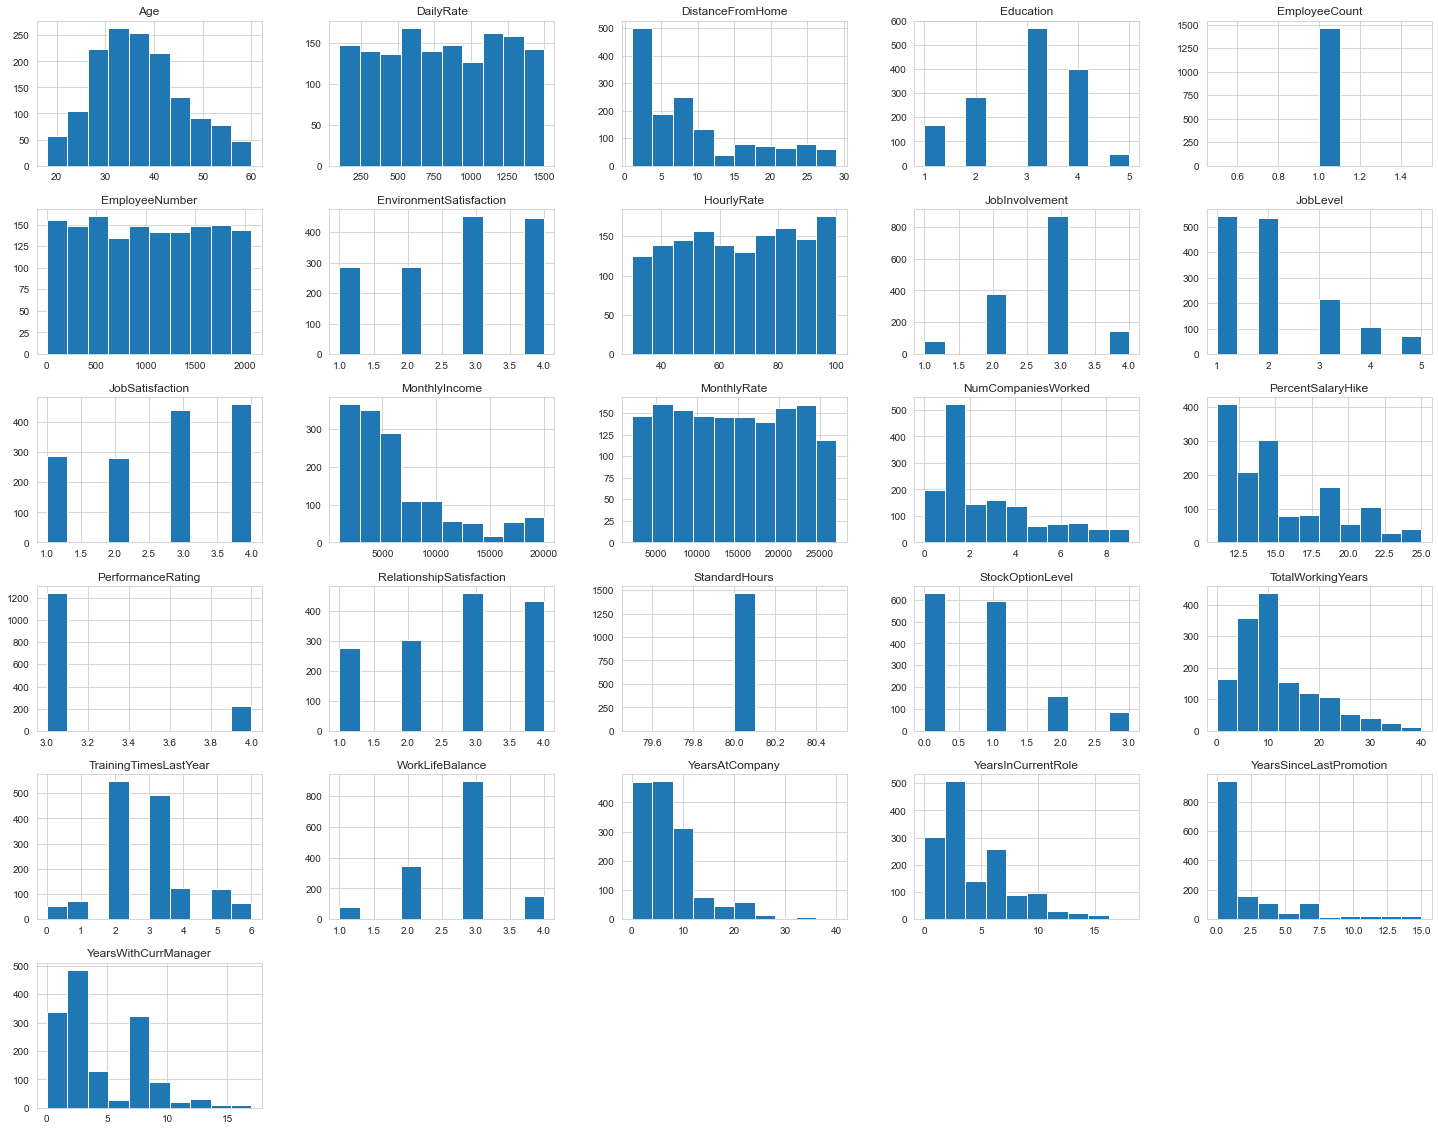

In [18]:
# Visualizing all columns using histogram
df.hist(figsize=(25,20))
plt.show()

In [19]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

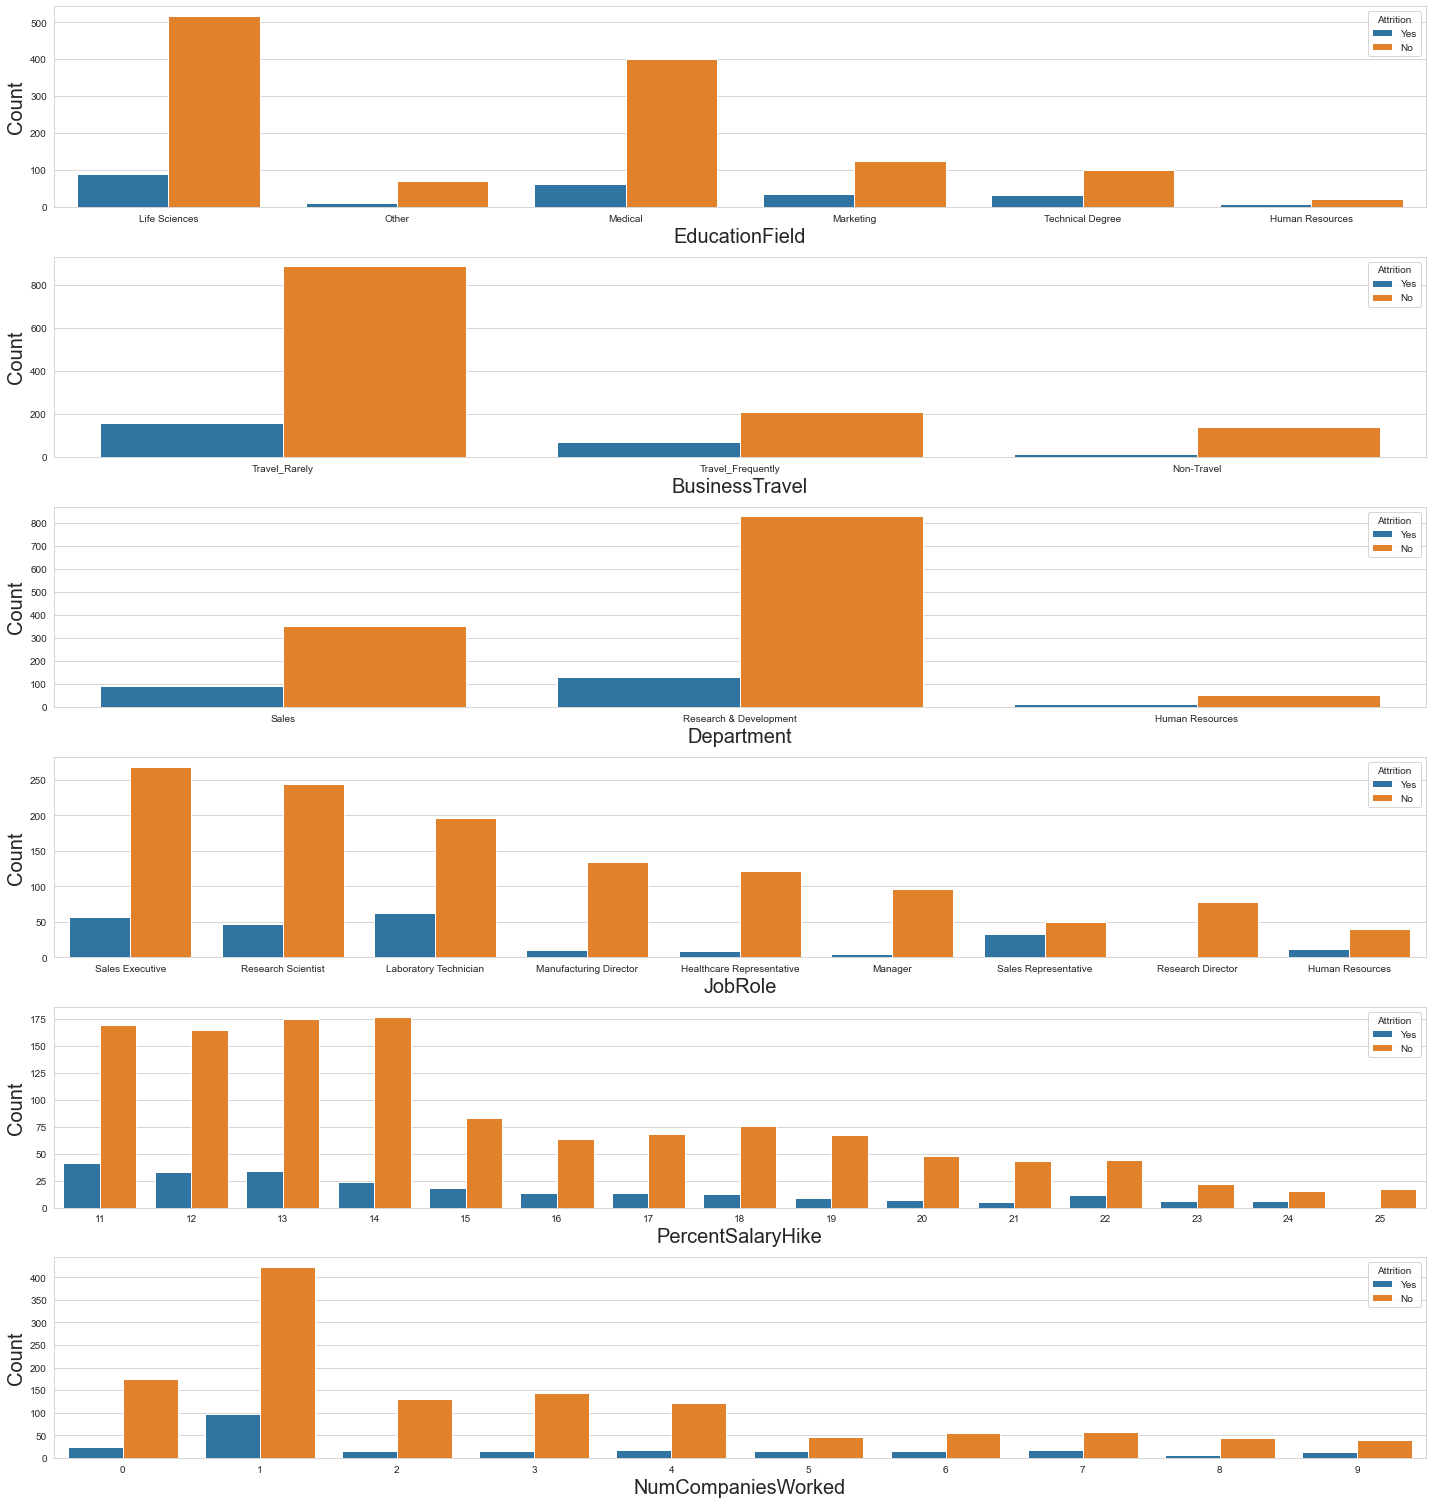

In [20]:
plt.figure(figsize=(20,21))
num=1
X = df[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y = df['Attrition']
for col in X:
    if num<=10:
        plt.subplot(6,1,num)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    num=num+1
plt.tight_layout()

* Employees from Life Science Education Field leave more followed by medical.
* Employees from R&D leave more.
* Employees who received salary hike between 10-14% are more likely to leave.
* Employees who worked only in one company are more likely to leave.
* Those whoe travel rarely likely to leave the organization

# Data Cleaning

In [21]:
# Dropping the columns which are not required for our analysis
df.drop(["EmployeeNumber","EmployeeCount","StandardHours","Over18"],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [22]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Seems there are skewness in data.

# Removing Outliers

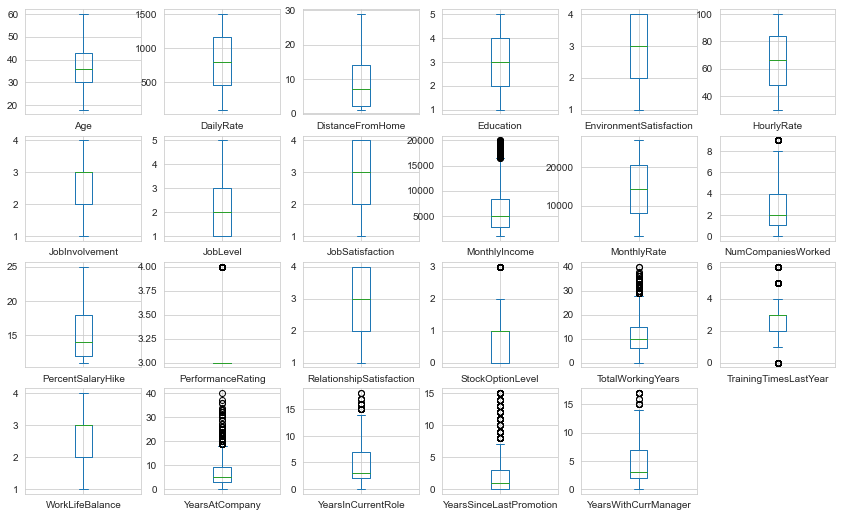

In [23]:
df.iloc[:,:].plot(kind='box',subplots=True,layout=(7,6))
plt.subplots_adjust(top=6,bottom=3,right=2)
plt.show()

We can see there are outliers present in data.

Label Encoding

In [24]:
label_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#label_list = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in label_list:
    df[i] = le.fit_transform(df[i])
df.head()    

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [25]:
# saving the z score values

import scipy
from scipy.stats import zscore  
z=np.abs(zscore(df))
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,0.660531,1.224745,...,0.426230,1.584178,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,1.169781,0.816497,...,0.426230,0.658973,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.764121,1.061787,0.937414,1.169781,1.224745,...,0.426230,0.266233,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.887515,1.868426,0.565311,1.575686,0.816497,...,0.426230,1.191438,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.703764,0.891688,0.565311,0.254625,0.816497,...,0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.393938,1.868426,0.565311,1.169781,0.816497,...,0.426230,1.584178,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.640727,0.085049,0.937414,0.660531,0.816497,...,2.346151,0.658973,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.887515,0.085049,0.565311,1.169781,0.816497,...,0.426230,1.191438,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [26]:
len(np.where(z>3)[0])

110

In [27]:
# creating new dataframe with zscore values less than 3
df_new=df[(z<3).all(axis=1)] # removed the outliers more than3 
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


In [28]:
#to drop Outliers;
print("old dataFrame",df.shape)
print("new dataFrame",df_new.shape)
print("total dropped rows",df.shape[0]-df_new.shape[0])

old dataFrame (1470, 31)
new dataFrame (1387, 31)
total dropped rows 83


Data Loss:

In [29]:
loss_percent=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print(loss_percent,'%')

5.646258503401361 %


# Correlation

In [30]:
df_new.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,0.014098,-0.039430,...,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.112393,0.036252,...,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,0.001183,-0.025364,...,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,0.033123,-0.005242,...,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.014540,-0.030618,...,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,-0.019279,-0.000819,...,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,-0.026223,-0.019166,...,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.047924,0.010676,...,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,1.000000,-0.015715,...,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,-0.000819,-0.019166,0.010676,-0.015715,1.000000,...,-0.010757,0.041458,0.026438,-0.058555,-0.040211,0.000134,-0.045123,-0.025536,-0.028162,-0.036280


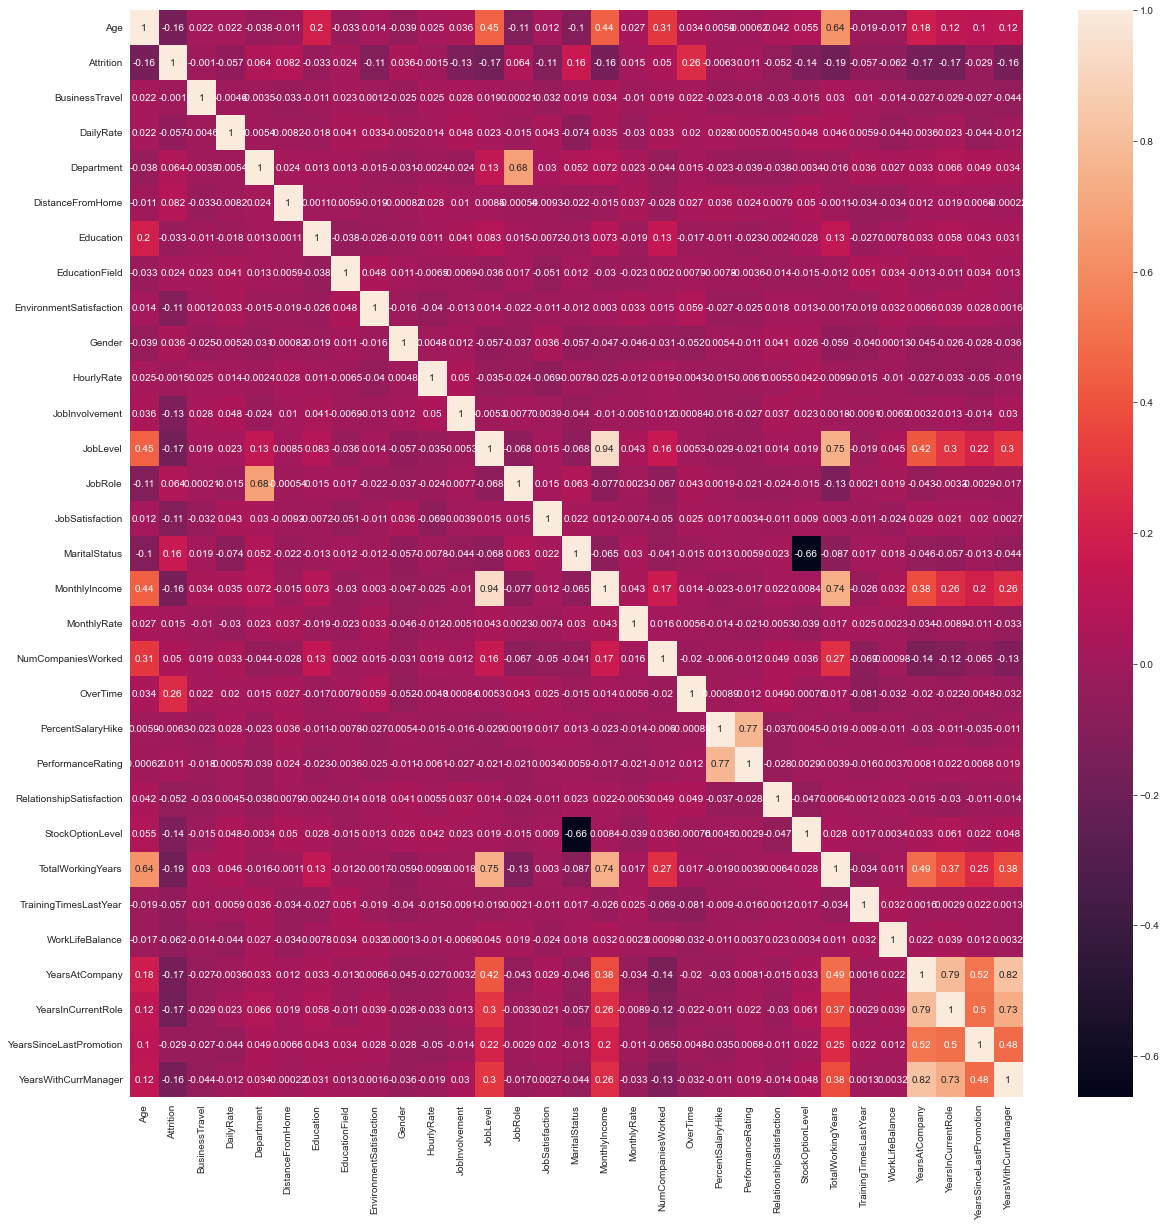

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

We can see -
* Job Level is highly positively correlated with Monthly Income and Total working years.
* Performance Rating is highly positively correlated with Percent Salary Hike.
* Similarly Years at company is highly positively correlated with Years with current manager and years in current role.
* Stock option level is highly negatively correlated with marital status.

In [32]:
corr=df_new.corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.081788
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.050314
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.006267
YearsSinceLastPromotion    -0.029263
Education                  -0.032703
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
StockOptionLevel           -0.136676
Age                        -0.159366
MonthlyIncome              -0.161848
YearsWithCurrManager       -0.162297
Y

# Skewness:

In [33]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

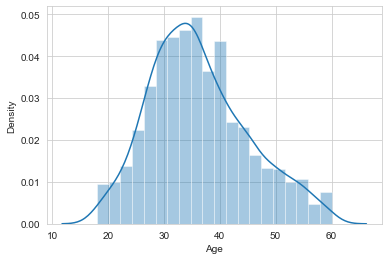

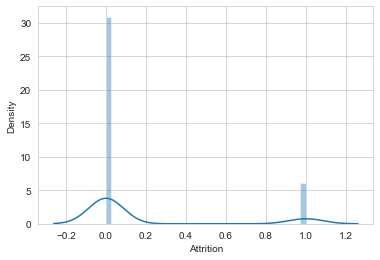

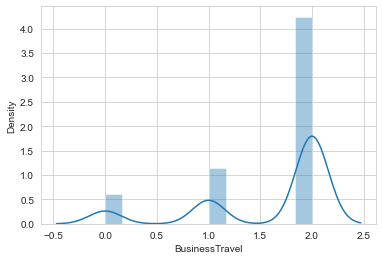

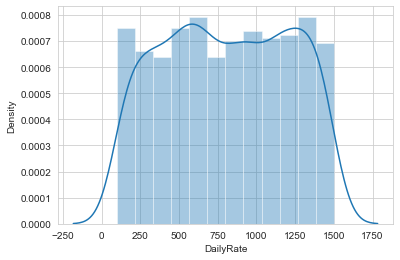

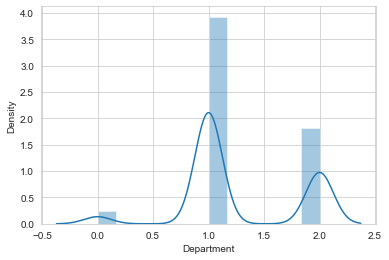

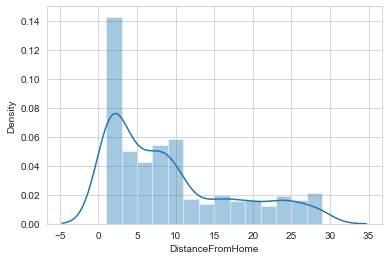

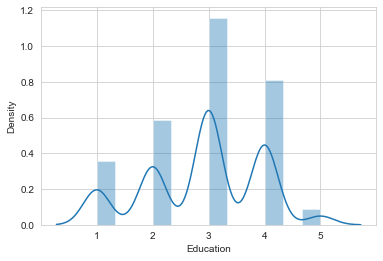

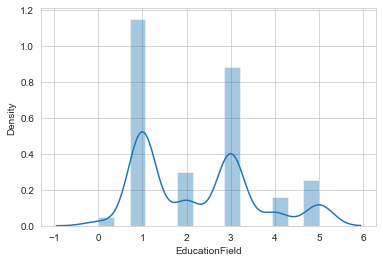

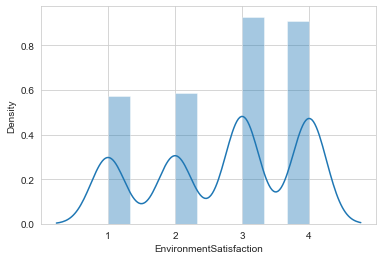

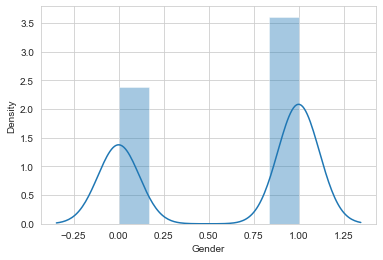

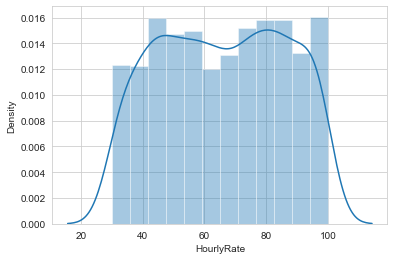

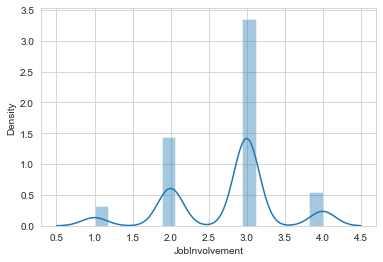

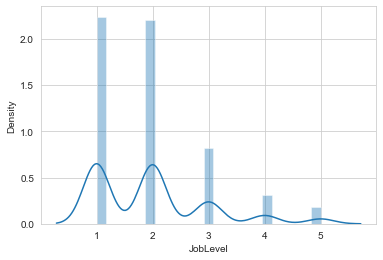

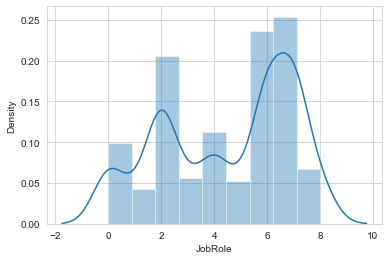

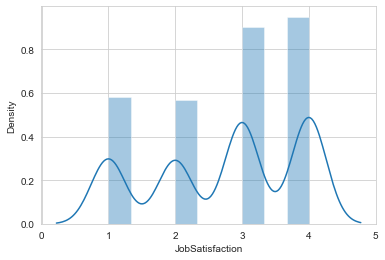

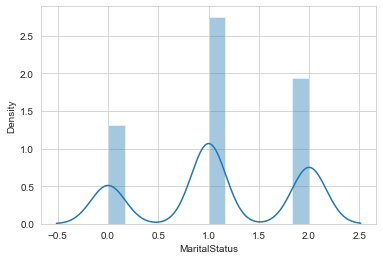

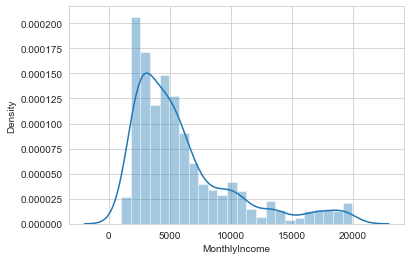

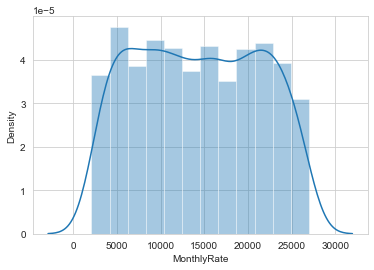

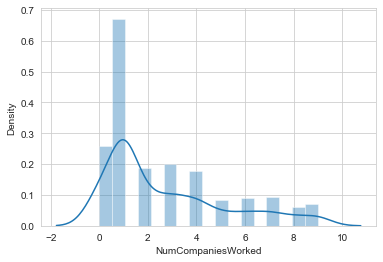

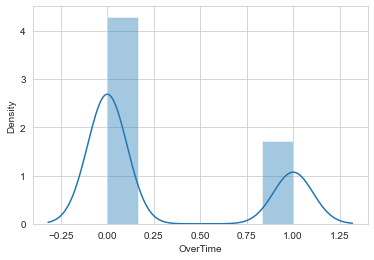

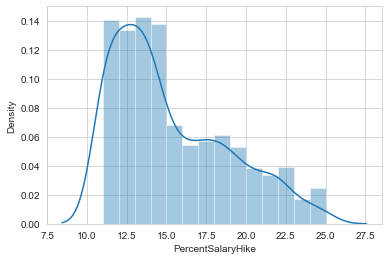

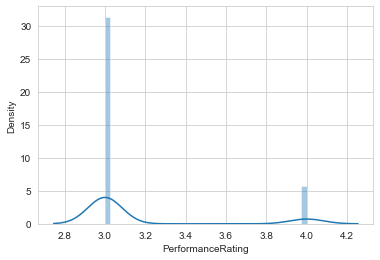

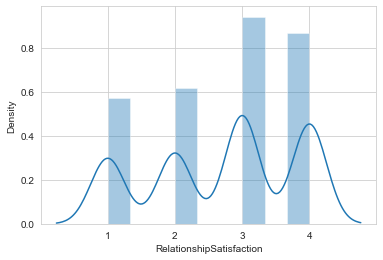

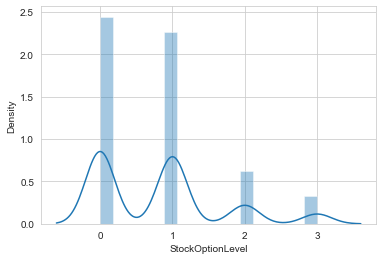

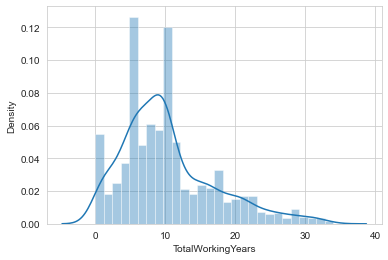

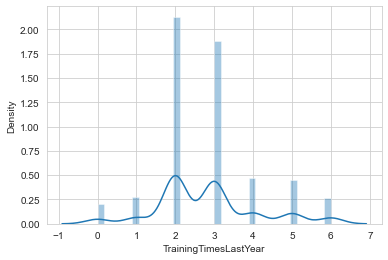

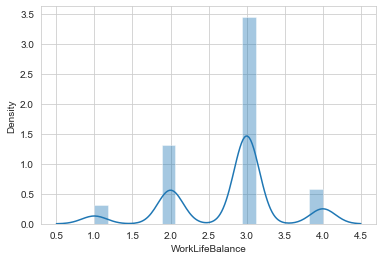

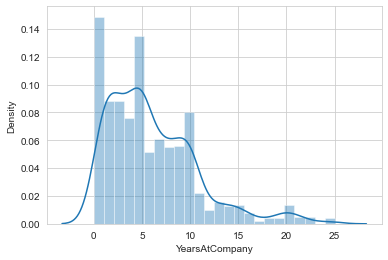

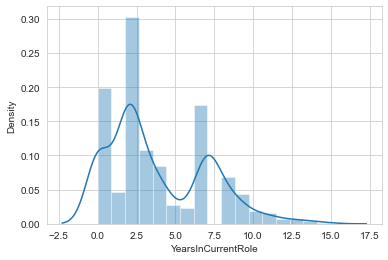

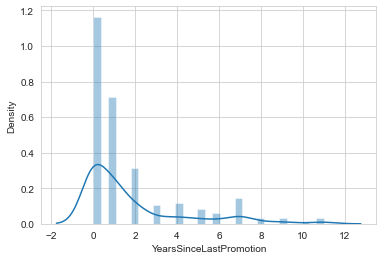

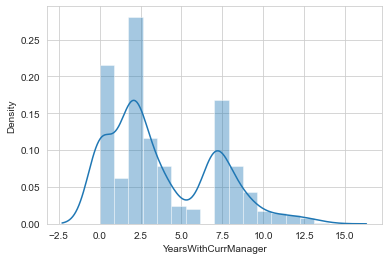

In [34]:
# Lets check Skewness using distplot
for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i])
    plt.show()

Splitting the data into independent variable and target variable

In [51]:
x = df_new.drop("Attrition", axis=1)
y = df_new['Attrition']
df2=pd.DataFrame(x,columns=x.columns)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [36]:
#In order to reduce Skewness of all the columns, using PowerTransformation
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in x.columns:
    if x[i].dtype != "object":
        if abs(x.loc[:,i].skew())>0.55:
            x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1))

In [37]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.5366811 ,  0.63872976,  0.73432467, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.44211114, -1.38077628, -1.30776866, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.08396607,  0.63872976,  1.40675151, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.04782149,  0.63872976, -1.61544736, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.44211114, -1.38077628,  0.53830356, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.2555702 ,  0.63872976, -0.44180199, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

Checking for Multicollinearity

In [38]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"]=df2.columns
vif_data["VIF Value"]=[variance_inflation_factor(pd.DataFrame(x).values, i)
                          for i in range(len(pd.DataFrame(x).columns))]
print(vif_data)

                    Features  VIF Value
0                        Age   1.870163
1             BusinessTravel   1.014151
2                  DailyRate   1.025271
3                 Department   2.150340
4           DistanceFromHome   1.017302
5                  Education   1.058800
6             EducationField   1.020867
7    EnvironmentSatisfaction   1.024346
8                     Gender   1.024337
9                 HourlyRate   1.023685
10            JobInvolvement   1.019847
11                  JobLevel   5.985286
12                   JobRole   2.008305
13           JobSatisfaction   1.023595
14             MaritalStatus   2.295292
15             MonthlyIncome   5.843391
16               MonthlyRate   1.021724
17        NumCompaniesWorked   1.424735
18                  OverTime   1.028685
19         PercentSalaryHike   1.017161
20         PerformanceRating        NaN
21  RelationshipSatisfaction   1.022404
22          StockOptionLevel   2.277378
23         TotalWorkingYears   4.088753


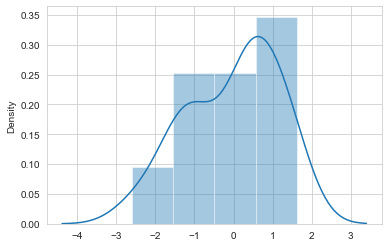

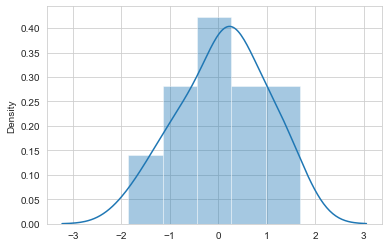

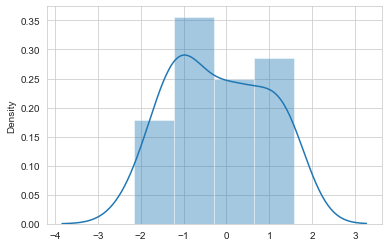

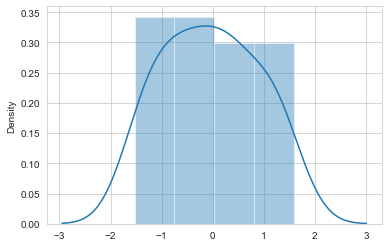

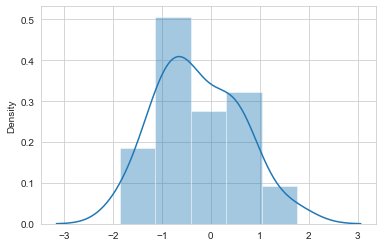

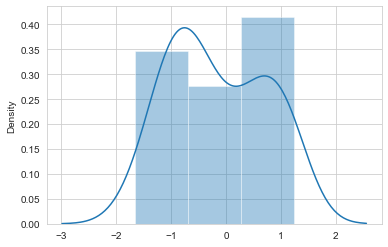

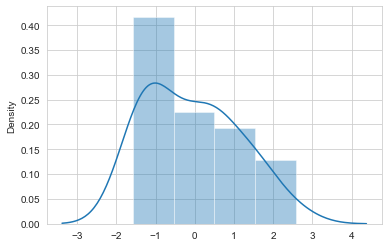

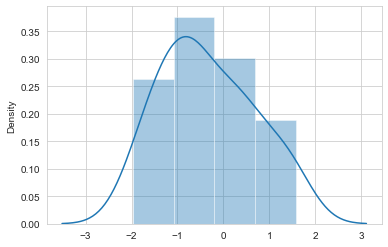

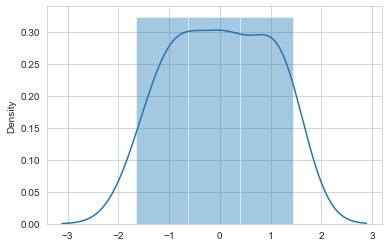

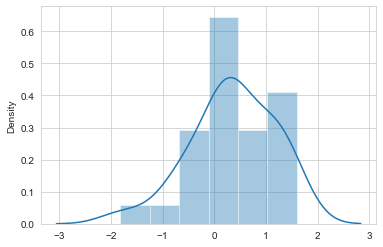

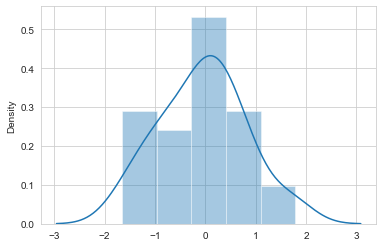

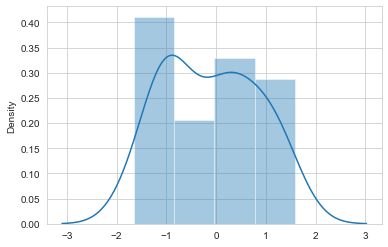

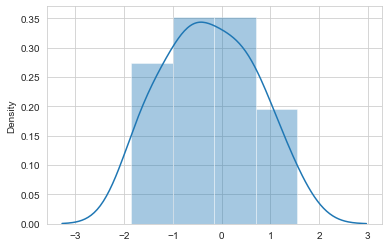

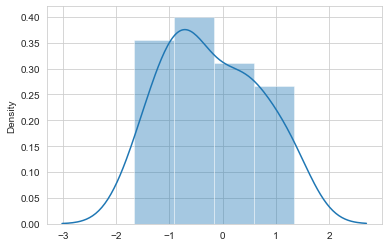

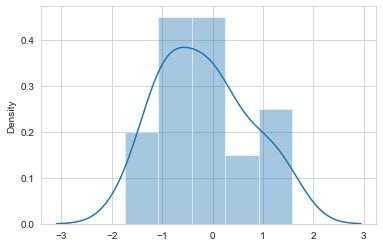

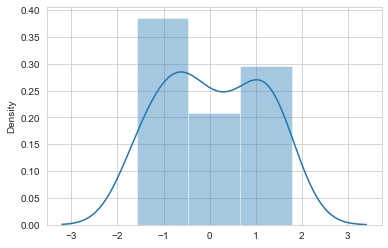

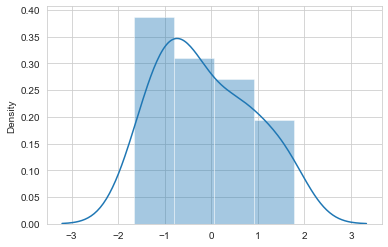

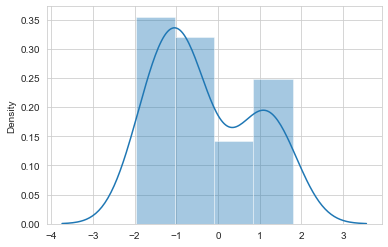

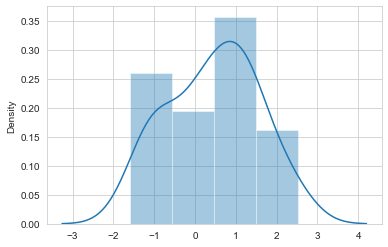

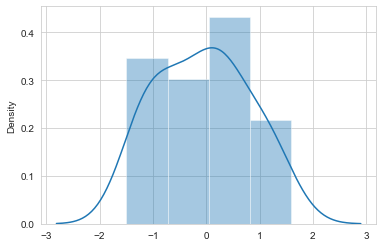

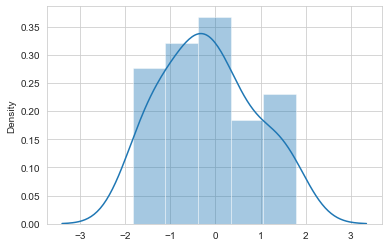

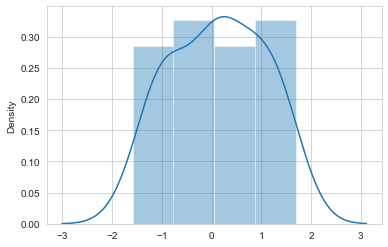

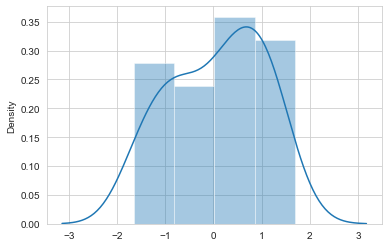

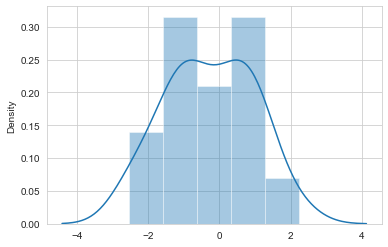

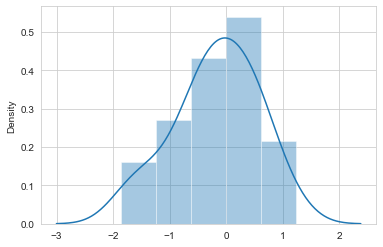

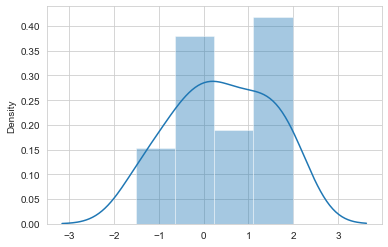

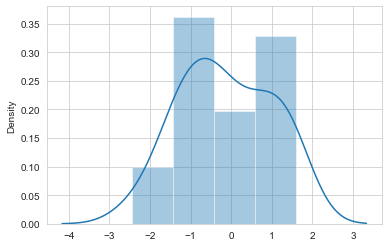

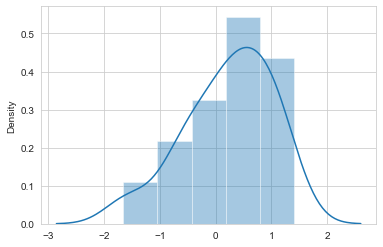

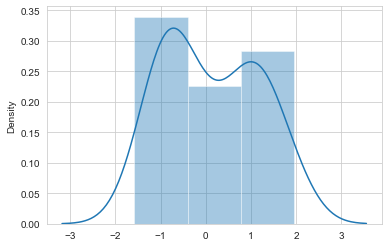

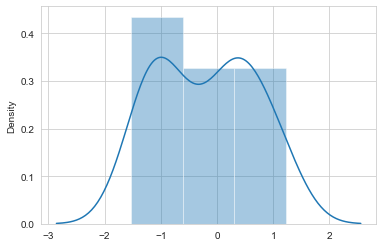

In [39]:
#Let's see the distribution for each column post transformation

for i in range(30):
    plt.figure()
    sns.distplot(x[i])

We can see skewness is removed, we can proceed with Model.

# Principal Component Analysis

<BarContainer object of 30 artists>

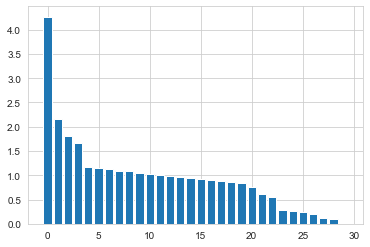

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

In [41]:
pca_new = PCA(n_components=29)
x = pca_new.fit_transform(x)
print(x.shape)

(1387, 29)


In [42]:
x

array([[-4.21274606e-01,  5.82120931e-01, -2.36968635e+00, ...,
        -7.66691364e-01,  1.51082519e-01,  7.48521678e-02],
       [-1.49084697e+00, -8.04254264e-01,  3.71435804e-01, ...,
        -6.88798307e-01,  1.13874030e-01,  1.21480543e-01],
       [ 3.52232080e+00,  1.66924178e+00, -2.44312335e-01, ...,
         2.73716421e-01, -4.25526077e-01,  2.99866165e-01],
       ...,
       [ 5.52974028e-01,  1.71191899e-01,  7.87750072e-01, ...,
        -1.20705182e-01,  3.95214724e-01, -2.88926913e-03],
       [-1.66568533e+00, -1.40498885e-01, -1.30998439e+00, ...,
        -1.86675121e-02, -2.21731480e-01,  2.03535704e-02],
       [ 3.89664407e-01,  8.87845310e-03,  2.77566022e-01, ...,
        -4.55905119e-01,  5.34054744e-02,  3.37055511e-01]])

In [43]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

# Modelling

# KBest Features Selection:

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat=SelectKBest(score_func=f_classif,k=29)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df2.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(29,'Score'))

                     Feature       Score
0                        Age  100.138293
20         PerformanceRating   37.527506
10            JobInvolvement   33.012193
2                  DailyRate   32.170062
19         PercentSalaryHike   29.203846
13           JobSatisfaction   21.618089
15             MonthlyIncome   18.252749
12                   JobRole   10.778577
4           DistanceFromHome    9.804626
22          StockOptionLevel    8.605170
8                     Gender    8.527573
9                 HourlyRate    7.575328
23         TotalWorkingYears    6.806272
7    EnvironmentSatisfaction    5.746578
5                  Education    4.756990
27        YearsInCurrentRole    4.184719
17        NumCompaniesWorked    2.761270
11                  JobLevel    2.208452
18                  OverTime    1.926673
6             EducationField    1.744827
3                 Department    1.624897
25           WorkLifeBalance    1.408436
1             BusinessTravel    1.289654
21  Relationship

In [52]:
#selecting best features for model
x_best=df2.drop(columns=['MonthlyIncome','RelationshipSatisfaction','MaritalStatus','YearsSinceLastPromotion','TrainingTimesLastYear','MonthlyRate','YearsAtCompany'])

In [56]:

pd.DataFrame(x_best).head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,4,8,1,11,3,0,8,1,4,5
1,49,1,279,1,8,1,1,3,1,61,...,2,1,0,23,4,1,10,3,7,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,6,1,15,3,0,7,3,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,1,1,11,3,0,8,3,7,0
4,27,2,591,1,2,1,3,1,1,40,...,2,9,0,12,3,1,6,3,2,2


In [57]:
#transforming the label data using scaling
x_best_scl=sc.fit_transform(x_best)

# Finding best random state

In [58]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_best_scl,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8962536023054755  on Random state 180


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_best_scl,y,test_size=0.25, random_state=180)

# ML Model for classification:

Running all the models and checking their accuracy and cross validation score. The model with least difference between Cross Validation and Accuracy Score is our best model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print('\n')
    

Accuracy score: of LogisticRegression()
0.8876080691642652
[[293  12]
 [ 27  15]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       305
           1       0.56      0.36      0.43        42

    accuracy                           0.89       347
   macro avg       0.74      0.66      0.69       347
weighted avg       0.87      0.89      0.88       347

Cross Validation Score: 0.8399423421551567
Difference Between Accuracy Score and CrossValidation Score: 0.04766572700910843


Accuracy score: of SVC()
0.8847262247838616
[[299   6]
 [ 34   8]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       305
           1       0.57      0.19      0.29        42

    accuracy                           0.88       347
   macro avg       0.73      0.59      0.61       347
weighted avg       0.86      0.88      0.86       347

Cross Validation Score: 0.8348959821312626
Difference Between Accuracy 

Logistic Regression is giving highest accuracy score.

# Hyper Parameter Tunning

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.0001,0.001,0.01,0.1,0,1,1.1],'penalty' :['l2', 'elasticnet', 'none'],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class': ['auto', 'ovr', 'multinomial'],'fit_intercept': [True,False],'dual': [True,False],'max_iter':[100,200,300,400,500],'random_state':[1,2,3,4,5,10,20,30,40,45]}

clf = GridSearchCV(LogisticRegression(), parameters, cv=5)
clf.fit(x_train, y_train)
clf.best_params_ 



{'C': 0.1,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'newton-cg'}

In [64]:
clf_pred=clf.best_estimator_.predict(x_test)
print(accuracy_score(y_test,clf_pred))

0.8789625360230547


In [70]:
lg1=LogisticRegression(C=0.1,fit_intercept =True, multi_class= 'auto', penalty= 'l2', solver= 'newton-cg',dual=False,max_iter=100,random_state=1)
lg1.fit(x_train,y_train)
predlg1=lg1.predict(x_test)
print('Accuracy score: of',lg1)
acc=accuracy_score(y_test,predlg1)
print(acc)
print(confusion_matrix(y_test,predlg1))
print(classification_report(y_test,predlg1))

Accuracy score: of LogisticRegression(C=0.1, random_state=1, solver='newton-cg')
0.8789625360230547
[[294  11]
 [ 31  11]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       305
           1       0.50      0.26      0.34        42

    accuracy                           0.88       347
   macro avg       0.70      0.61      0.64       347
weighted avg       0.86      0.88      0.86       347



# ROC AUC

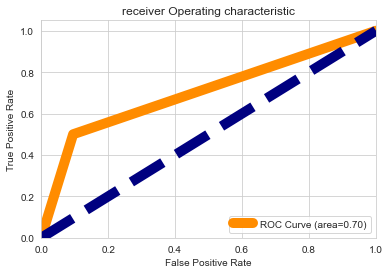

In [71]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predlg1,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver Operating characteristic')
plt.legend(loc="lower right")
plt.show()
#Blue line is base model and accuracy of this model is 0.5 or 50%, orange is random model.So the trained model should have accuracy more than .5.


As logistic regression gave us better accuracy with hyper tuning and AUC value, we are saving this model.

# Model Saving

In [72]:
import pickle
filename='HR.pkl'
pickle.dump(lg1,open(filename,'wb'))

# Conclusion


In [73]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predlg1},index=range(len(a)))
df_com

,original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
342,0,0
343,0,0
344,0,0
345,0,0
